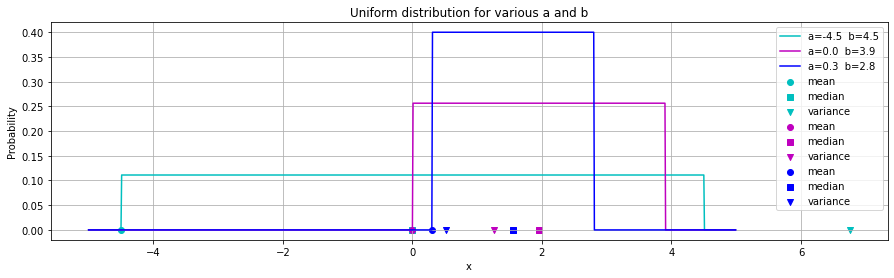

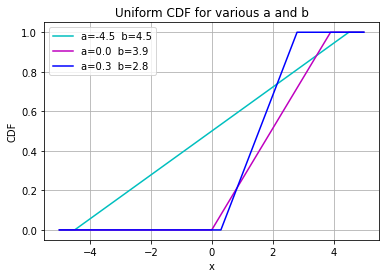

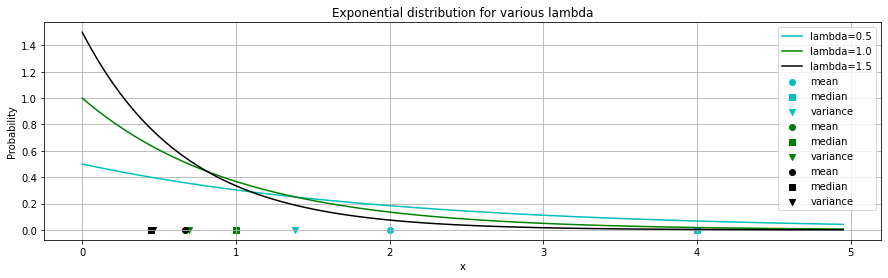

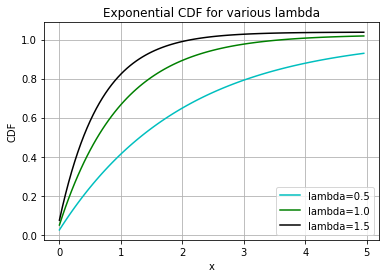

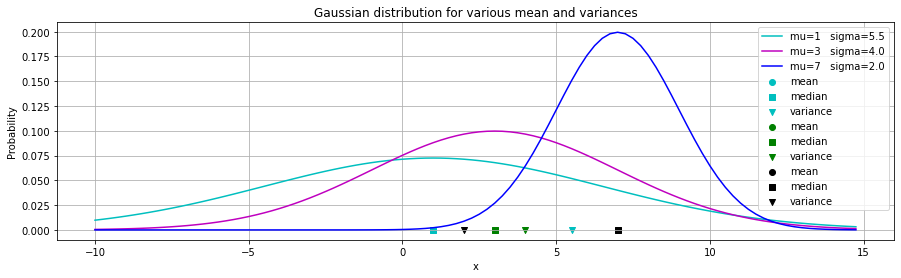

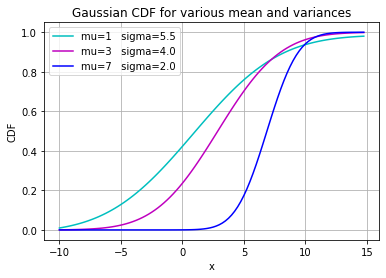

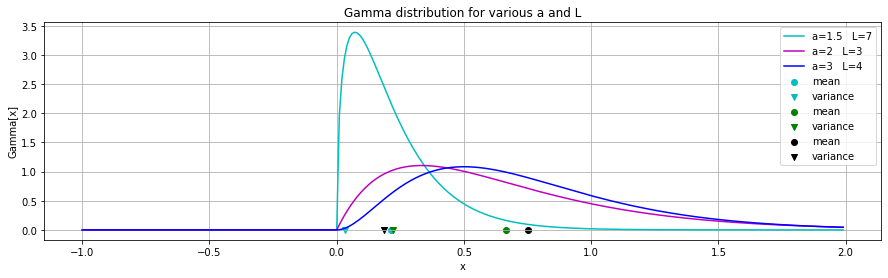

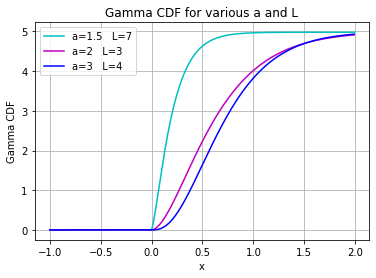

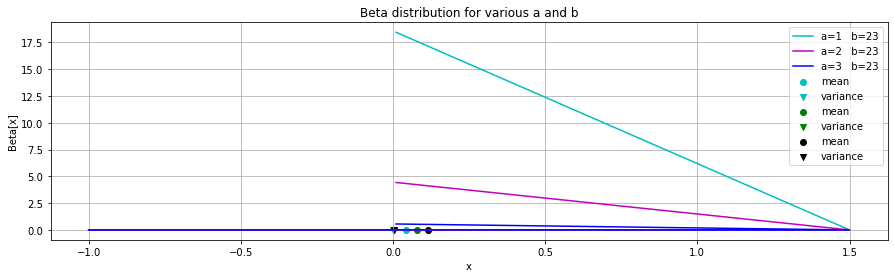

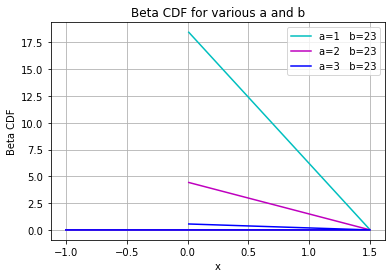

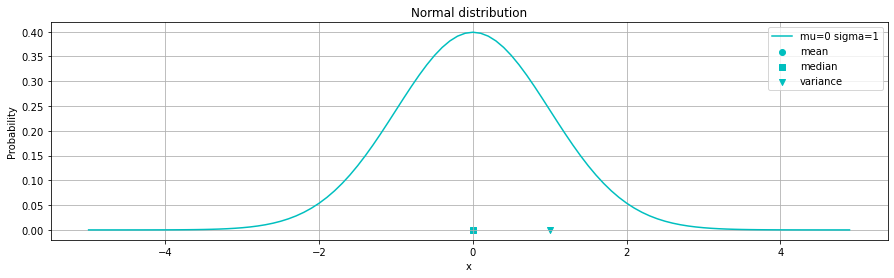

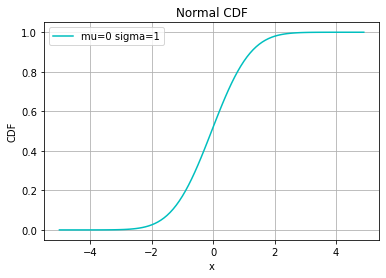

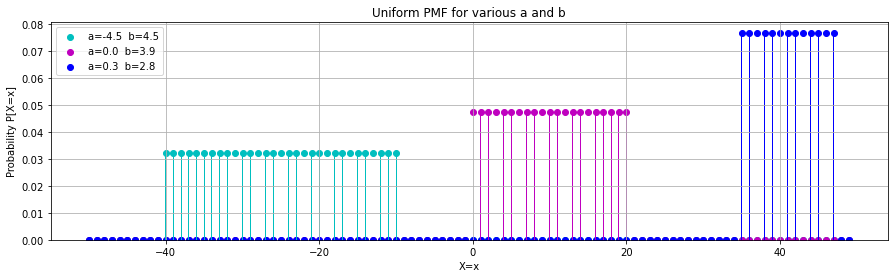

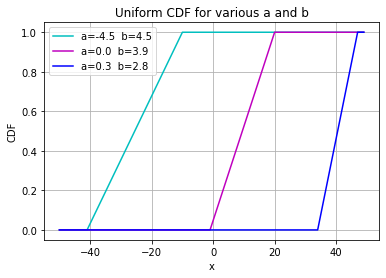

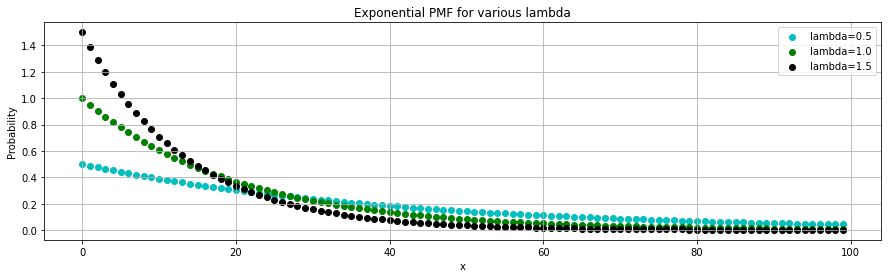

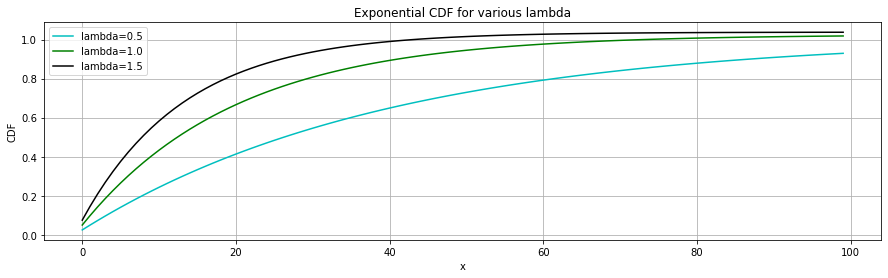

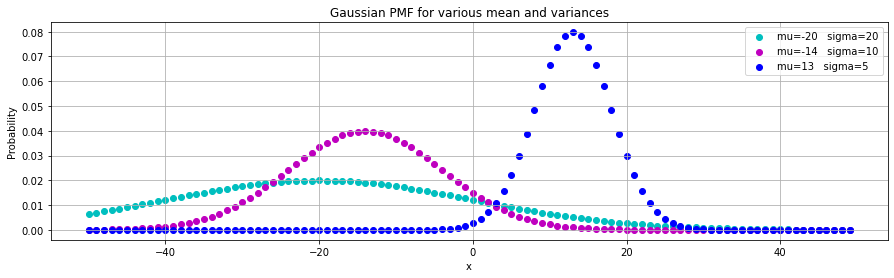

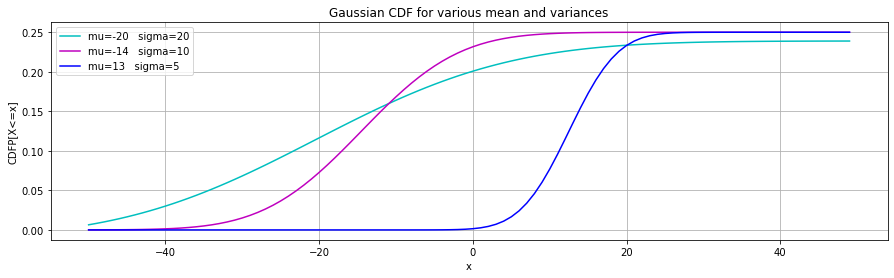

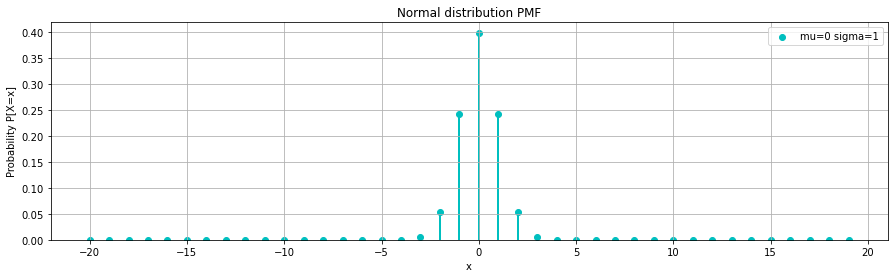

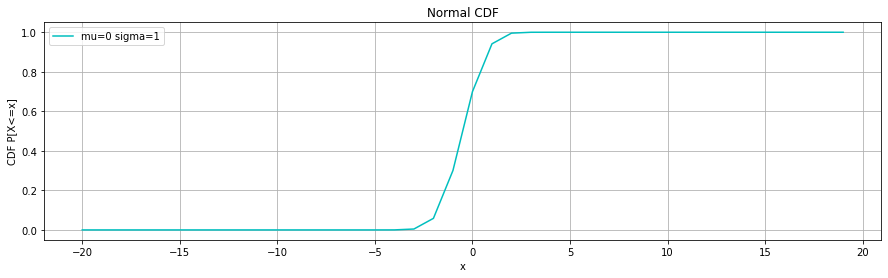

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import math
def nishan():
    n=100
    uni={}
    uni_cdf={}
    expo={}
    expo_cdf={}
    gauss={}
    gauss_cdf={}
    normal=[]
    normal_cdf=[]
    gamma={}
    gamma_cdf={}
    beta={}
    beta_cdf={}
    t=np.arange(-5,5,0.01)
    t2=np.arange(0,5,0.05)
    t3=np.arange(-10,15,0.25)
    t4=np.arange(-5,5,0.1)
    t5=np.arange(-1,2,0.01)
    t6=[-1,1.5,0.01]
    lam=np.array([0.5,1,1.5])
    a=np.array([-4.5,0,0.3])
    b=np.array([4.5,3.9,2.8])
    mu=np.array([1,3,7])
    sig=np.array([5.5,4,2])
    col=['c','m','b','r','y','k','g']
    ag=[1.5,2,3]
    L=[7,3,4]
    beta_a=[1,2,3]
    beta_b=[23,23,23]
    uni_mean=np.empty([len(a)])
    for i in range(3):
        keyy=lam[i]
        expo[keyy]=[]
        expo_cdf[keyy]=[]
        keyuni=str(a[i])+"_"+str(b[i])
        uni[keyuni]=[]
        uni_cdf[keyuni]=[]
        keygauss=str(mu[i])+"_"+str(sig[i])
        gauss[keygauss]=[]
        gauss_cdf[keygauss]=[]
        keygamma=str(ag[i])+"_"+str(L[i])
        gamma[keygamma]=[]
        gamma_cdf[keygamma]=[]
        keybeta=str(beta_a[i])+"_"+str(beta_b[i])
        beta[keybeta]=[]
        beta_cdf[keybeta]=[]
    j=0
    for key in uni:
        for i in t:
            if i<=a[j] or i>=b[j]:
                uni[key].append(0)
            else:
                uni[key].append(1/(b[j]-a[j]))
            uni_cdf[key].append(0)
        j+=1
    j=0
    for key in uni_cdf:
        for i in range(len(t)):
            if t[i]>=a[j]:
                uni_cdf[key][i]=uni_cdf[key][i-1]+uni[key][i]/100
            else:
                continue
        j+=1
    k=0
    for key in gauss:
        for i in t3:
            v=np.exp(-(i-mu[k])**2/(2*sig[k]**2))/np.sqrt(2*np.pi*sig[k]**2)
            gauss[key].append(v)
        k+=1
    k=0
    for key in gauss_cdf:
        for i in range(len(t3)):
            if i==0:
                gauss_cdf[key].append(gauss[key][i])
            else:
                gauss_cdf[key].append(gauss_cdf[key][i-1]+gauss[key][i]/4)
        k+=1
    k=0
    for i in t4:
        v=np.exp(-i**2/2)/np.sqrt(2*np.pi)
        normal.append(v)
    k=0
    for i in range(len(t4)):
        if i==0:
            normal_cdf.append(normal[i])
        else:
            normal_cdf.append(normal_cdf[i-1]+normal[i]/10)
    for key in expo:
        for i in range(n):
            expo[key].append(lam[k]*np.exp(-1*lam[k]*(t2[i])))
        k+=1
    k=0
    for key in expo_cdf:
        for i in range(n):
            if i==0:
                expo_cdf[key].append(expo[key][i]/20)
            else:
                expo_cdf[key].append(expo_cdf[key][i-1]+expo[key][i]/20)
        k+=1
    k=0
    for key in gamma:
        for i in range(len(t5)):
            if t5[i]>=0:
                gamma[key].append((L[k]**ag[k])*(t5[i]**(ag[k]-1))*(np.exp(-L[k]*t5[i]))/math.gamma(ag[k]))
            else:
                gamma[key].append(0)
        k+=1
    k=0
    for key in gamma_cdf:
        for i in range(len(t5)):
            if i==0:
                gamma_cdf[key].append(gamma[key][i])
            else:
                gamma_cdf[key].append(gamma_cdf[key][i-1]+gamma[key][i]/20)
        k+=1
        k=0
    for key in beta:
        for i in range(len(t6)):
            if 0<=t6[i]<1:
                beta[key].append(((math.gamma(beta_a[k]+beta_b[k])*(t6[i]**(beta_a[k]-1))*((1-t6[i])**(beta_b[k]-1))/((math.gamma(beta_a[k])*math.gamma(beta_b[k]))))))
            else:
                beta[key].append(0)
        k+=1
    k=0
    for key in beta_cdf:
        for i in range(len(t6)):
            if i==0:
                beta_cdf[key].append(beta[key][i])
            else:
                beta_cdf[key].append(beta_cdf[key][i-1]+beta[key][i])
        k+=1
    fig=1
    i=0
    plt.figure(fig,figsize=(15,4))
    for key in uni:
        labl='a='+str(a[i])+'  b='+str(b[i])
        plt.plot(t,uni[key],col[i],label=labl)
        plt.xlabel('x')
        plt.ylabel('Probability')
        plt.grid('True')
        #uni_mean[i]=np.mean(np.array(uni[key]))
        mean = a[i]
        median = (a[i]+b[i])/2
        variance = (1/12)*(b[i]-a[i])**2
        plt.scatter(mean,0,color=col[i],label='mean',marker='o')
        plt.scatter(median,0,color=col[i],label='median',marker='s')
        plt.scatter(variance,0,color=col[i],label='variance',marker='v')
        i+=1
    plt.legend()
    titl='Uniform distribution for various a and b'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig)
    for key in uni_cdf:
        labl='a='+str(a[i])+'  b='+str(b[i])
        plt.plot(t,uni_cdf[key],col[i],label=labl)
        plt.xlabel('x')
        plt.ylabel('CDF')
        plt.grid('True')
        i+=1
    plt.legend()
    titl='Uniform CDF for various a and b'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig,figsize=(15,4))
    for key in expo:
        labl='lambda='+str(lam[i])
        plt.plot(t2,expo[key],col[-i],label=labl)
        plt.xlabel('x')
        plt.ylabel('Probability')
        plt.grid('True')
        mean = 1/lam[i]
        median = 1/lam[i]**2
        variance = np.log(2)/lam[i]
        plt.scatter(mean,0,color=col[-i],label='mean',marker='o')
        plt.scatter(median,0,color=col[-i],label='median',marker='s')
        plt.scatter(variance,0,color=col[-i],label='variance',marker='v')
        i+=1
    plt.legend()
    titl='Exponential distribution for various lambda'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig)
    for key in expo_cdf:
        labl='lambda='+str(lam[i])
        plt.plot(t2,expo_cdf[key],col[-i],label=labl)
        plt.xlabel('x')
        plt.ylabel('CDF')
        plt.grid('True')
        i+=1
    plt.legend()
    titl='Exponential CDF for various lambda'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig,figsize=(15,4))
    for key in gauss:
        labl='mu='+str(mu[i])+'   sigma='+str(sig[i])
        plt.plot(t3,gauss[key],col[i],label=labl)
        plt.xlabel('x')
        plt.ylabel('Probability')
        plt.grid('True')
        mean = mu[i]
        median = mu[i]
        variance = sig[i]
        plt.scatter(mean,0,color=col[-i],label='mean',marker='o')
        plt.scatter(median,0,color=col[-i],label='median',marker='s')
        plt.scatter(variance,0,color=col[-i],label='variance',marker='v')
        i+=1
    plt.legend()
    titl='Gaussian distribution for various mean and variances'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig)
    for key in gauss_cdf:
        labl='mu='+str(mu[i])+'   sigma='+str(sig[i])
        plt.plot(t3,gauss_cdf[key],col[i],label=labl)
        plt.xlabel('x')
        plt.ylabel('CDF')
        plt.grid('True')
        i+=1
    plt.legend()
    titl='Gaussian CDF for various mean and variances'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig,figsize=(15,4))
    for key in gamma:
        labl='a='+str(ag[i])+'   L='+str(L[i])
        plt.plot(t5,gamma[key],col[i],label=labl)
        plt.xlabel('x')
        plt.ylabel('Gamma[x]')
        plt.grid('True')
        mean = ag[i]/L[i]
        variance = ag[i]/L[i]**2
        plt.scatter(mean,0,color=col[-i],label='mean',marker='o')
        plt.scatter(variance,0,color=col[-i],label='variance',marker='v')
        i+=1
    plt.legend()
    titl='Gamma distribution for various a and L'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig)
    for key in gamma_cdf:
        labl='a='+str(ag[i])+'   L='+str(L[i])
        plt.plot(t5,gamma_cdf[key],col[i],label=labl)
        plt.xlabel('x')
        plt.ylabel('Gamma CDF')
        plt.grid('True')
        i+=1
    plt.legend()
    titl='Gamma CDF for various a and L'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig,figsize=(15,4))
    for key in beta:
        labl='a='+str(beta_a[i])+'   b='+str(beta_b[i])
        plt.plot(t6,beta[key],col[i],label=labl)
        plt.xlabel('x')
        plt.ylabel('Beta[x]')
        plt.grid('True')
        mean = beta_a[i]/(beta_a[i]+beta_b[i])
        median=(beta_a[i]-1/3)/(beta_a[i]+beta_b[i]-2/3)
        variance = (beta_a[i]*beta_b[i]/(pow((beta_a[i]+beta_b[i]),2)*(beta_a[i]+beta_b[i]+1)))
        plt.scatter(mean,0,color=col[-i],label='mean',marker='o')
        plt.scatter(variance,0,color=col[-i],label='variance',marker='v')
        i+=1
    plt.legend()
    titl='Beta distribution for various a and b'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig)
    for key in beta_cdf:
        labl='a='+str(beta_a[i])+'   b='+str(beta_b[i])
        plt.plot(t6,beta_cdf[key],col[i],label=labl)
        plt.xlabel('x')
        plt.ylabel('Beta CDF')
        plt.grid('True')
        i+=1
    plt.legend()
    titl='Beta CDF for various a and b'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig,figsize=(15,4))
    labl='mu=0'+' sigma=1'
    plt.plot(t4,normal,col[i],label=labl)
    mean = 0
    median = 0
    variance = 1
    plt.scatter(mean,0,color=col[-i],label='mean',marker='o')
    plt.scatter(median,0,color=col[-i],label='median',marker='s')
    plt.scatter(variance,0,color=col[-i],label='variance',marker='v')
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.grid('True')
    plt.legend()
    titl='Normal distribution'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig)
    labl='mu=0'+' sigma=1'
    plt.plot(t4,normal_cdf,col[i],label=labl)
    plt.xlabel('x')
    plt.ylabel('CDF')
    plt.grid('True')
    plt.legend()
    titl='Normal CDF'
    plt.title(titl)
    fig+=1
    i=0
    #=============================================Discrete Distributions============================================#
    uni_d={}
    uni_cdf_d={}
    expo_d={}
    expo_cdf_d={}
    gauss_d={}
    gauss_cdf_d={}
    normal_d=[]
    normal_cdf_d=[]
    t_d=np.arange(-50,50,1)
    t2_d=np.arange(0,100,1)
    t3_d=np.arange(-50,50,1)
    t4_d=np.arange(-20,20,1)
    lam_d=np.array([0.5,1,1.5])
    a_d=np.array([-40,0,35])
    b_d=np.array([-10,20,47])
    mu_d=np.array([-20,-14,13])
    sig_d=np.array([20,10,5])
    #col=['c','m','b','r','y','k','g']
    #uni_mean=np.empty([len(a)])
    for i in range(3):
        keyy=lam[i]
        expo_d[keyy]=[]
        expo_cdf_d[keyy]=[]
        keyuni=str(a[i])+"_"+str(b[i])
        uni_d[keyuni]=[]
        uni_cdf_d[keyuni]=[]
        keygauss=str(mu[i])+"_"+str(sig[i])
        gauss_d[keygauss]=[]
        gauss_cdf_d[keygauss]=[]
    j=0
    for key in uni_d:
        for i in range(len(t_d)):
            if t_d[i]<a_d[j] or t_d[i]>b_d[j]:
                uni_d[key].append(0)
            else:
                uni_d[key].append(1/(b_d[j]-a_d[j]+1))
            uni_cdf_d[key].append(0)
        j+=1
    j=0
    for key in uni_cdf_d:
        for i in range(len(t_d)):
            if t_d[i]>=a_d[j]:
                uni_cdf_d[key][i]=uni_cdf_d[key][i-1]+uni_d[key][i]
            else:
                continue
        j+=1
    k=0
    for key in gauss_d:
        for i in t3_d:
            v=np.exp(-(i-mu_d[k])**2/(2*sig_d[k]**2))/np.sqrt(2*np.pi*sig_d[k]**2)
            gauss_d[key].append(v)
        k+=1
    k=0
    for key in gauss_cdf_d:
        for i in range(len(t3_d)):
            if i==0:
                gauss_cdf_d[key].append(gauss_d[key][i])
            else:
                gauss_cdf_d[key].append(gauss_cdf_d[key][i-1]+gauss_d[key][i]/4)
        k+=1
    k=0
    for i in t4_d:
        v=np.exp(-i**2/2)/np.sqrt(2*np.pi)
        normal_d.append(v)
    k=0
    for i in range(len(t4_d)):
        if i==0:
            normal_cdf_d.append(normal_d[i])
        else:
            normal_cdf_d.append(normal_cdf_d[i-1]+normal_d[i])
    for key in expo_d:
        for i in range(len(t2_d)):
            expo_d[key].append(lam[k]*np.exp(-1*lam_d[k]*(t2[i])))
        k+=1
    k=0
    for key in expo_cdf_d:
        for i in range(len(t2_d)):
            if i==0:
                expo_cdf_d[key].append(expo_d[key][i]/20)
            else:
                expo_cdf_d[key].append(expo_cdf_d[key][i-1]+expo_d[key][i]/20)
        k+=1
    k=0
    #fig=1
    i=0
    plt.figure(fig,figsize=(15,4))
    for key in uni_d:
        labl='a='+str(a[i])+'  b='+str(b[i])
        plt.scatter(t_d,uni_d[key],color=col[i],label=labl)
        plt.bar(t_d,uni_d[key],color=col[i],width=0.1)
        i+=1
    plt.xlabel('X=x')
    plt.ylabel('Probability P[X=x]')
    plt.grid('True')
    plt.legend()
    titl='Uniform PMF for various a and b'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig)
    for key in uni_cdf_d:
        labl='a='+str(a[i])+'  b='+str(b[i])
        plt.plot(t_d,uni_cdf_d[key],color=col[i],label=labl)
        plt.xlabel('x')
        plt.ylabel('CDF')
        plt.grid('True')
        i+=1
    plt.legend()
    titl='Uniform CDF for various a and b'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig,figsize=(15,4))
    for key in expo_d:
        labl='lambda='+str(lam_d[i])
        plt.scatter(t2_d,expo_d[key],color=col[-i],label=labl)
        #plt.bar(t2_d,expo_d[key],color=col[-i],width=0.1)
        plt.xlabel('x')
        plt.ylabel('Probability')
        plt.grid('True')
        i+=1
    plt.legend()
    titl='Exponential PMF for various lambda'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig,figsize=(15,4))
    for key in expo_cdf_d:
        labl='lambda='+str(lam[i])
        plt.plot(t2_d,expo_cdf_d[key],color=col[-i],label=labl)
        #plt.bar(t2_d,expo_cdf_d[key],col[-i])
        plt.xlabel('x')
        plt.ylabel('CDF')
        plt.grid('True')
        i+=1
    plt.legend()
    titl='Exponential CDF for various lambda'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig,figsize=(15,4))
    for key in gauss_d:
        labl='mu='+str(mu_d[i])+'   sigma='+str(sig_d[i])
        plt.scatter(t3_d,gauss_d[key],color=col[i],label=labl)
        #plt.bar(t3_d,gauss_d[key],color=col[i],width=0.1)
        plt.xlabel('x')
        plt.ylabel('Probability')
        plt.grid('True')
        i+=1
    plt.legend()
    titl='Gaussian PMF for various mean and variances'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig,figsize=(15,4))
    for key in gauss_cdf_d:
        labl='mu='+str(mu_d[i])+'   sigma='+str(sig_d[i])
        plt.plot(t3_d,gauss_cdf_d[key],color=col[i],label=labl)
        #plt.bar(t3,gauss_cdf_d[key],col[i])
        plt.xlabel('x')
        plt.ylabel('CDFP[X<=x]')
        plt.grid('True')
        i+=1
    plt.legend()
    titl='Gaussian CDF for various mean and variances'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig,figsize=(15,4))
    labl='mu=0'+' sigma=1'
    plt.scatter(t4_d,normal_d,color=col[i],label=labl)
    plt.bar(t4_d,normal_d,color=col[i],width=0.1)
    plt.xlabel('x')
    plt.ylabel('Probability P[X=x]')
    plt.grid('True')
    plt.legend()
    titl='Normal distribution PMF'
    plt.title(titl)
    fig+=1
    i=0
    plt.figure(fig,figsize=(15,4))
    labl='mu=0'+' sigma=1'
    plt.plot(t4_d,normal_cdf_d,color=col[i],label=labl)
    plt.xlabel('x')
    plt.ylabel('CDF P[X<=x]')
    plt.grid('True')
    plt.legend()
    titl='Normal CDF'
    plt.title(titl)
    fig+=1
    i=0
nishan()